In [1]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats, optimize, interpolate
from scipy.integrate import odeint
from labellines import labelLine, labelLines
plt.rcParams.update({'font.size': 18})

D= 0.012937501604878256 k_het = 0.0001375563428750243 T= 1073 P= 20000 CMTS0= 0.09090909090909091
(1000,)
n= 1000 : at t = 27777.8 hours, pore is 2.55 % closed
n= 2000 : at t = 55555.6 hours, pore is 4.07 % closed
n= 3000 : at t = 83333.4 hours, pore is 5.57 % closed
n= 4000 : at t = 111111.2 hours, pore is 7.05 % closed
n= 5000 : at t = 138889.0 hours, pore is 8.5 % closed
n= 6000 : at t = 166666.8 hours, pore is 9.93 % closed
n= 7000 : at t = 194444.6 hours, pore is 11.34 % closed
n= 8000 : at t = 222222.4 hours, pore is 12.73 % closed
n= 9000 : at t = 250000.2 hours, pore is 14.09 % closed
n= 10000 : at t = 277778.0 hours, pore is 15.44 % closed
n= 11000 : at t = 305555.8 hours, pore is 16.76 % closed
n= 12000 : at t = 333333.6 hours, pore is 18.06 % closed
n= 13000 : at t = 361111.4 hours, pore is 19.35 % closed
n= 14000 : at t = 388889.2 hours, pore is 20.61 % closed
n= 15000 : at t = 416667.0 hours, pore is 21.85 % closed
n= 16000 : at t = 444444.8 hours, pore is 23.08 % closed
n

<Figure size 640x480 with 0 Axes>

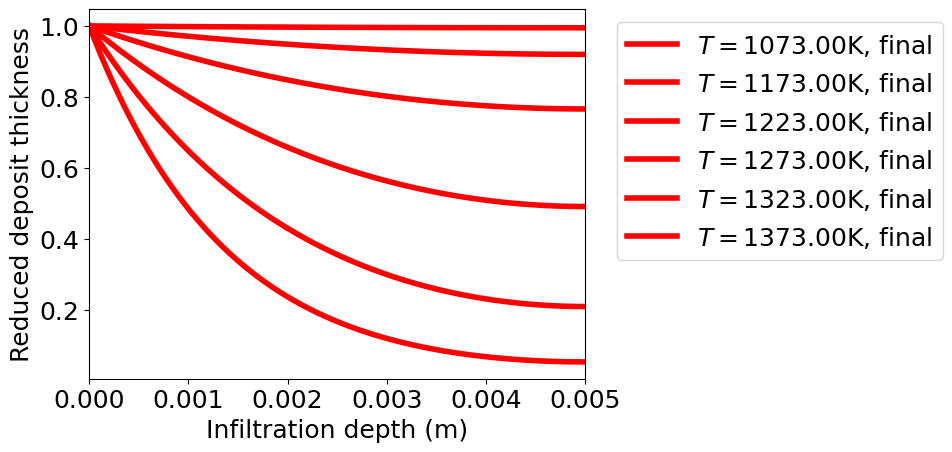

<Figure size 640x480 with 0 Axes>

In [2]:
def cvi_sim(Tin,Pin,rin,ain):
    phi0 = 100e-6
    L = rin*phi0
    rp0 = phi0/2
    nz = 1000
    dt = 100000 #s
    Zrange = np.linspace(0,L,nz)
    alpha = ain
    P = Pin # Pa
    T = Tin # K
    R = 8.314 # J/mol K
    CMTS0 = (1/(1+alpha))#*(P / (R*T)) 
    CH20 = (alpha/(1+alpha))*(P / (R*T)) 
    dCMTS0dz = dCH20dz = 0

    k0 = 389e9
    Ea = 296e3
    k_het = k0*np.exp(-Ea/(R*T))*CMTS0
    dK = 3.97
    DK=dK*phi0*T**0.5 # m^2/s
    Ms = 0.04011 #kg/mol
    rhos = 3217 #kg/m^3
    Vs=Ms/rhos #m^3/mol
    Mg=0.149 #kg/mol
    Vg=0.0001227 #m^3/mol
    DF=1.360e-3*((T**1.5)/(P*(Vg**0.333+Vs**0.333)**2))*(1/Mg + 1/Ms)**0.5 #Gilliland formula Fedou1993 Appendix 1 Eq A4
    D = (1/DF + 1/DK)**(-1)
    tau = math.sqrt((k_het*L**2)/(D*phi0))


    print('D=',D,'k_het =',k_het,'T=',T,'P=',P, 'CMTS0=',CMTS0)

    rpi = rp0*np.ones(nz)
    rp = rpi
    drpdzi = np.zeros(nz)
    drpdz = drpdzi

    # zi = z*nz/L
    # print(zi)

    Ct = []
    rpt = []


    n = 0
    # for i in range(2):



    while any(rp<rp0/100) is not True:

        C = CMTS0*(np.cosh((1-(2*Zrange)/L)*tau))/(np.cosh(tau))

        if n == 1:
            print(C.shape)
            # print(dCdz.shape)

        condition = C<(1/1000)*CMTS0
        if any(condition):
            C[condition.argmax():] = 0

        #rp = rp - dt*2*Vs*k_het
        rp = rp*(1-dt*k_het*C*Vs)
        # lC2 = int(len(C)/2)
        k_het = k0*np.exp(-Ea/(R*T))*C[1]
        drpdz[:-1] = (rp[1:] - rp[:-1])/nz
        drpdz[-1] = drpdz[-2]

        n+=1
        Ct.append(C)
        rpt.append(rp)
        if n % 1000 == 0:
            percent_closed = 100*(1 -(rp[0]-rp0/100)/rp0)
            print('n=',n,': at t =',round(n*dt*0.000277778,2),'hours, pore is', round(percent_closed,2),'% closed')

    rpl = len(rpt)
    print(n)
    # initial_initial_C = np.zeros(nz)
    # initial_initial_C[0] = (1/(1+alpha))#*(P / (R*T)) 
    # if T == 1073 or P == 500:
    #     plt.plot(Zrange,initial_initial_C/(1/(1+alpha)),'b--', label= r'$t=0$s before penetration',linewidth=4)
    # else:
    #     plt.plot(Zrange,initial_initial_C/(1/(1+alpha)),'b--',linewidth=4)
    plt.plot(Zrange,C/(1/(1+alpha)),'r', label=r'$T=$%.2fK, final' %(T),linewidth=4)
    plt.xlabel(r'Infiltration depth (m)')
    plt.ylabel(r'Reduced deposit thickness')
    plt.xlim([0,L/2])
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    plt.savefig('Cz_T'+str(T)+'_P'+str(P)+'.png', dpi=220,bbox_inches='tight')

cvi_sim(1073, 20000, 100, 10) #temperature|T(K), pressure|P(Pa), ratio|L/phi0, porosity|alpha
cvi_sim(1173, 20000, 100, 10)
cvi_sim(1223, 20000, 100, 10)
cvi_sim(1273, 20000, 100, 10)
cvi_sim(1323, 20000, 100, 10)
cvi_sim(1373, 20000, 100, 10)
# labelLines(plt.get_lines(), zorder=2.5)

plt.figure()
# cvi_sim(1223, 500)
# cvi_sim(1223, 5000)
# cvi_sim(1223, 10000)
# cvi_sim(1223, 20000)
# cvi_sim(1223, 50000)
# cvi_sim(1223, 100000)
    
# plt.figure()
# plt.plot(Zrange,rpi,'b--', label=r'$t=0$s',linewidth=2.5)
# plt.plot(Zrange,rpt[int(1*rpl/5)],'k--', label=r'$t=$%.2fh' %(1*n*0.000277778*dt/5),linewidth=1.5)
# plt.plot(Zrange,rpt[int(2*rpl/5)],'k--', label=r'$t=$%.2fh' %(2*n*0.000277778*dt/5),linewidth=1.5)
# plt.plot(Zrange,rpt[int(3*rpl/5)],'k--', label=r'$t=$%.2fh' %(3*n*0.000277778*dt/5),linewidth=1.5)
# plt.plot(Zrange,rpt[int(4*rpl/5)],'k--', label=r'$t=$%.2fh' %(4*n*0.000277778*dt/5),linewidth=1.5)
# plt.plot(Zrange,rp,'r', label=r'$t=$%.2fh, final' %(n*0.000277778*dt),linewidth=6.5)
# plt.ylim([0,rp0])
# plt.xlim([0,L/2])
# #rp_init = np.ones(1000)
# plt.xlabel(r'Depth $(m)$')
# plt.ylabel(r'Pore radius $(m)$')
# plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
# plt.savefig('rpz_T'+str(T)+'_P'+str(P)+'.png', dpi=220,bbox_inches='tight')

# plt.figure()
# plt.plot(Zrange,rp0-rpi,'b--', label=r'$t=0$s',linewidth=2.5)
# plt.plot(Zrange,rp0-rpt[int(1*rpl/5)],'k--', label=r'$t=$%.2fh' %(1*n*0.000277778*dt/5),linewidth=1.5)
# plt.plot(Zrange,rp0-rpt[int(2*rpl/5)],'k--', label=r'$t=$%.2fh' %(2*n*0.000277778*dt/5),linewidth=1.5)
# plt.plot(Zrange,rp0-rpt[int(3*rpl/5)],'k--', label=r'$t=$%.2fh' %(3*n*0.000277778*dt/5),linewidth=1.5)
# plt.plot(Zrange,rp0-rpt[int(4*rpl/5)],'k--', label=r'$t=$%.2fh' %(4*n*0.000277778*dt/5),linewidth=1.5)
# plt.plot(Zrange,rp0-rp,'r', label=r'$t=$%.2fh, final' %(n*0.000277778*dt),linewidth=6.5)
# plt.ylim([0,rp0])
# plt.xlim([0,L/2])
# #rp_init = np.ones(1000)
# plt.xlabel(r'Depth $(m)$')
# plt.ylabel(r'Deposit thickness $(m)$')
# plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
# plt.savefig('dz_T'+str(T)+'_P'+str(P)+'.png', dpi=220,bbox_inches='tight')

# plt.figure()
# initial_initial_C = np.zeros(nz)
# initial_initial_C[0] = (1/(1+alpha))*(P / (R*T)) 
# plt.plot(Zrange,initial_initial_C,'g--', label= r'$t=0$s before penetration',linewidth=2.5)
# plt.plot(Zrange,Ct[0],'b--', label=r'$t=0$s after penetration',linewidth=2.5)
# plt.plot(Zrange,Ct[int(1*rpl/5)],'k--', label=r'$t=$%.2fh' %(1*n*0.000277778*dt/5),linewidth=1.5)
# plt.plot(Zrange,Ct[int(2*rpl/5)],'k--', label=r'$t=$%.2fh' %(2*n*0.000277778*dt/5),linewidth=1.5)
# plt.plot(Zrange,Ct[int(3*rpl/5)],'k--', label=r'$t=$%.2fh' %(3*n*0.000277778*dt/5),linewidth=1.5)
# plt.plot(Zrange,Ct[int(4*rpl/5)],'k--', label=r'$t=$%.2fh' %(4*n*0.000277778*dt/5),linewidth=1.5)
# plt.plot(Zrange,C,'r', label=r'$t=$%.2fh, final' %(5*n*0.000277778*dt/5),linewidth=6.5)
# plt.xlabel(r'$z \ (m)$')
# plt.ylabel(r'$C \ ($mol$/m^3)$')
# # plt.ylim([0,rp0])
# plt.xlim([0,L/2])
# plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
# plt.savefig('Cz_T'+str(T)+'_P'+str(P)+'.png', dpi=220,bbox_inches='tight')

# plt.figure()
# plt.plot(Zrange*1e3,C/0.04,'r', label=r'$T=$%.2fK, final' %(T),linewidth=6.5)
# plt.xlabel(r'Infiltration depth $\ (mm)$')
# plt.ylabel(r'Reduced deposit thickness')
# # plt.ylim([0,rp0])
# plt.xlim([0,L/2])
# plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
# plt.savefig('Cz_T'+str(T)+'_P'+str(P)+'.png', dpi=220,bbox_inches='tight')